## कद्दू की कीमत के लिए रैखिक और बहुपद प्रतिगमन - पाठ 3

आवश्यक पुस्तकालयों और डेटा सेट को लोड करें। डेटा को एक डेटा फ्रेम में बदलें जिसमें डेटा का एक उपसमूह हो:

- केवल उन कद्दुओं को प्राप्त करें जिनकी कीमत बुशल के आधार पर है  
- तारीख को महीने में बदलें  
- कीमत को उच्च और निम्न कीमतों के औसत के रूप में गणना करें  
- कीमत को बुशल मात्रा के आधार पर दर्शाने के लिए परिवर्तित करें  


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

एक स्कैटरप्लॉट हमें याद दिलाता है कि हमारे पास केवल अगस्त से दिसंबर तक का मासिक डेटा है। हमें संभवतः निष्कर्ष निकालने के लिए रैखिक रूप में अधिक डेटा की आवश्यकता होगी।


<AxesSubplot:xlabel='Month', ylabel='Price'>

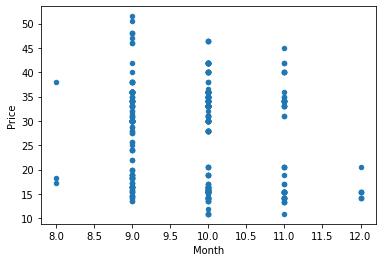

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

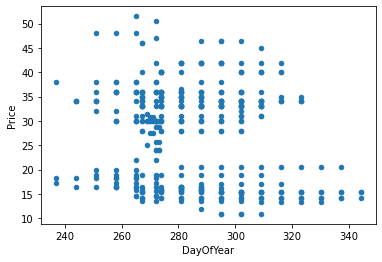

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


ऐसा लगता है कि सहसंबंध काफी छोटा है, लेकिन कुछ और अधिक महत्वपूर्ण संबंध है - क्योंकि ऊपर दिए गए प्लॉट में मूल्य बिंदु कई अलग-अलग समूहों में दिखाई देते हैं। आइए एक प्लॉट बनाते हैं जो विभिन्न कद्दू की किस्मों को दिखाएगा:


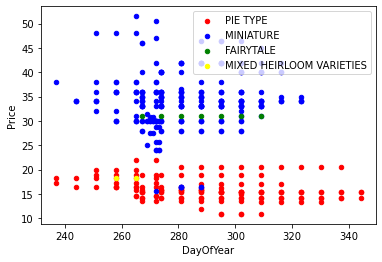

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

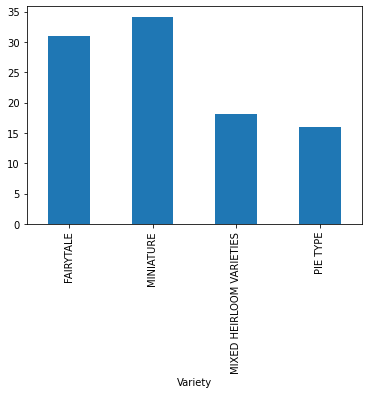

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

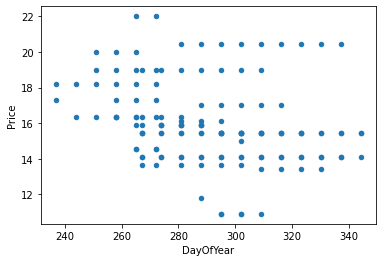

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### रैखिक प्रतिगमन

हम Scikit Learn का उपयोग करके रैखिक प्रतिगमन मॉडल को प्रशिक्षित करेंगे:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


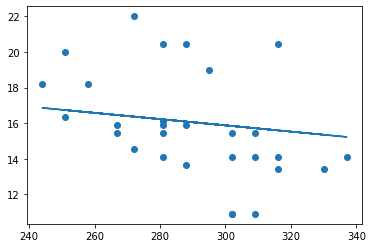

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

रेखा की ढलान को रैखिक प्रतिगमन गुणांक से निर्धारित किया जा सकता है:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### बहुपद प्रतिगमन

कभी-कभी विशेषताओं और परिणामों के बीच का संबंध स्वाभाविक रूप से गैर-रेखीय होता है। उदाहरण के लिए, कद्दू की कीमतें सर्दियों में (महीने=1,2) अधिक हो सकती हैं, फिर गर्मियों में (महीने=5-7) गिर सकती हैं, और फिर बढ़ सकती हैं। रैखिक प्रतिगमन इस संबंध को सटीक रूप से नहीं समझ सकता।

इस स्थिति में, हम अतिरिक्त विशेषताओं को जोड़ने पर विचार कर सकते हैं। एक सरल तरीका यह है कि इनपुट विशेषताओं से बहुपदों का उपयोग करें, जिससे **बहुपद प्रतिगमन** प्राप्त होगा। Scikit Learn में, हम पाइपलाइनों का उपयोग करके स्वचालित रूप से बहुपद विशेषताओं की पूर्व-गणना कर सकते हैं:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


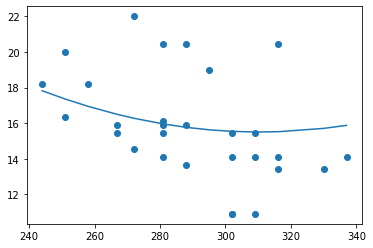

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### विभिन्न प्रकारों को एन्कोड करना

आदर्श स्थिति में, हम चाहते हैं कि एक ही मॉडल का उपयोग करके विभिन्न कद्दू की किस्मों की कीमतों का अनुमान लगाया जा सके। किस्म को ध्यान में रखने के लिए, सबसे पहले हमें इसे संख्यात्मक रूप में बदलना होगा, या **एन्कोड** करना होगा। इसे करने के कई तरीके हैं:

* सरल संख्यात्मक एन्कोडिंग, जो विभिन्न किस्मों की एक तालिका बनाएगी, और फिर किस्म के नाम को उस तालिका में एक इंडेक्स से बदल देगी। यह रैखिक प्रतिगमन (linear regression) के लिए सबसे अच्छा तरीका नहीं है, क्योंकि रैखिक प्रतिगमन इंडेक्स के संख्यात्मक मान को ध्यान में रखता है, और यह संख्यात्मक मान कीमत के साथ संख्यात्मक रूप से मेल खाने की संभावना नहीं रखता।
* वन-हॉट एन्कोडिंग (One-hot encoding), जो `Variety` कॉलम को 4 अलग-अलग कॉलम से बदल देगी, प्रत्येक किस्म के लिए एक कॉलम। यह कॉलम 1 दिखाएगा यदि संबंधित पंक्ति दी गई किस्म की है, और अन्यथा 0 दिखाएगा।

नीचे दिया गया कोड दिखाता है कि हम किस प्रकार एक किस्म को वन-हॉट एन्कोड कर सकते हैं:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### विविधता पर रैखिक प्रतिगमन

अब हम ऊपर दिए गए कोड का ही उपयोग करेंगे, लेकिन `DayOfYear` के बजाय हम अपनी वन-हॉट-एन्कोडेड विविधता को इनपुट के रूप में उपयोग करेंगे:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


हम उसी तरीके से अन्य विशेषताओं का उपयोग करने की कोशिश कर सकते हैं, और उन्हें संख्यात्मक विशेषताओं जैसे `Month` या `DayOfYear` के साथ संयोजित कर सकते हैं:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### बहुपद प्रतिगमन

बहुपद प्रतिगमन का उपयोग उन श्रेणीबद्ध विशेषताओं के साथ भी किया जा सकता है जिन्हें वन-हॉट-एन्कोड किया गया हो। बहुपद प्रतिगमन को प्रशिक्षित करने के लिए कोड मूल रूप से वही होगा जैसा हमने ऊपर देखा है।


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता के लिए प्रयासरत हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को आधिकारिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।  
